In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.inspection import permutation_importance, partial_dependence
from sklearn.metrics import r2_score, mean_absolute_error

import shap
import xgboost

from training_models import *


In [37]:
train_df = pd.read_csv('../data/data_ready_for_models/DerateInNextTwoHours_ffill_05_10_train.csv')
test_df = pd.read_csv('../data/data_ready_for_models/DerateInNextTwoHours_ffill_05_10_test.csv')

train_df = ensure_target_cols_removed(train_df)
test_df = ensure_target_cols_removed(test_df)

train_df = train_df.dropna()
test_df = test_df.dropna()

X_train, y_train = split_X_y(train_df)
X_test, y_test = split_X_y(test_df)

#xgb = xgboost.XGBRegressor(tree_method="hist", enable_categorical = True).fit(X_train, y_train)
xgb = xgboost.XGBClassifier().fit(X_train, y_train)
#logreg = LogisticRegression().fit(X_train, y_train)

C:\Users\irela\AppData\Local\Temp\ipykernel_29880\922676233.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/data_ready_for_models/DerateInNextTwoHours_ffill_05_10_train.csv')


In [ ]:
def plot_feature_explainer(fitted_model, X_test, plot_type, model_type=None, i=None, feature_col_name=None):
    if model_type=='tree':
        explainer = shap.explainers.Tree(fitted_model)
    elif model_type=='linear':
        explainer = shap.explainers.Linear(fitted_model, X_test)
    else:
        raise ValueError("Please spedcify model type as 'linear' or 'tree'.")

    explanation = explainer(X_test)

    def waterfall_plot(i):
        shap.plots.waterfall(explanation[i])

    def force_plot(i):
        shap.plots.initjs()
        shap.plots.force(explanation[i])

    def global_predictions_plot(feature_col_name):
        shap.plots.scatter(explanation[:, feature_col_name], color=explanation)

    def beeswarm_plot():
        shap.plots.beeswarm(explanation)

    def avg_bar_plot():
        shap.plots.bar(explanation)

    if i is None and (plot_type == 'waterfall' or plot_type == 'force_plot'):
        raise ValueError('Must specify which feature i you want to plot.')
    else:
        if plot_type == 'waterfall':
            print('Plotting waterfall plot...')
            waterfall_plot(i)
        elif plot_type == 'force_plot':
            print('Plotting force plot...')
            force_plot(i)
        elif plot_type == 'global_predictions':
            print('Plotting global predictions plot...')
            global_predictions_plot(feature_col_name)
        elif plot_type == 'beeswarm':
            print('Plotting beeswarm plot...')
            beeswarm_plot()
        elif plot_type == 'avg_bar':
            print('Plotting average bar plot...')
            avg_bar_plot()
        else:
            raise ValueError("Error: plot_type must be 'waterfall', 'force_plot', 'global_predictions', 'beeswarm', or 'avg_bar'.")


Plotting waterfall plot...


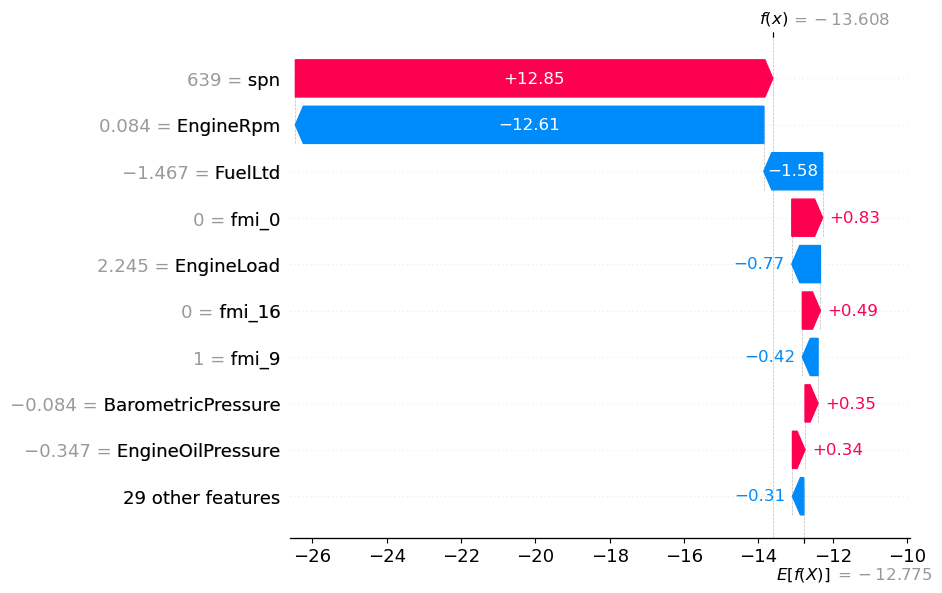

In [45]:
plot_feature_explainer(xgb, X_test, plot_type='waterfall', model_type='tree', i=1)


Plotting global predictions plot...


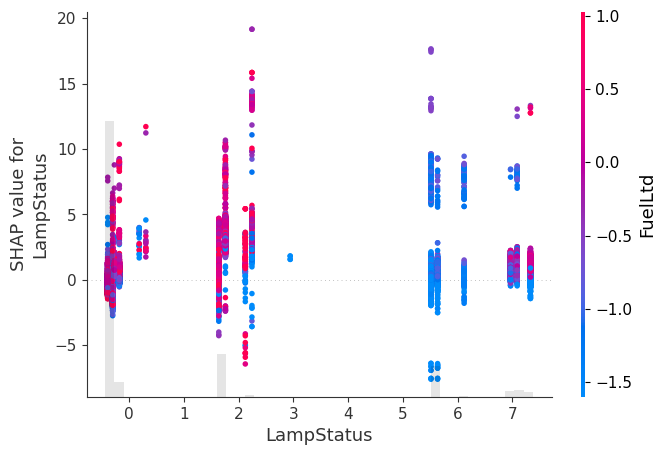

In [46]:
plot_feature_explainer(xgb, X_test, plot_type='global_predictions', model_type='tree', feature_col_name='LampStatus')

Plotting beeswarm plot...


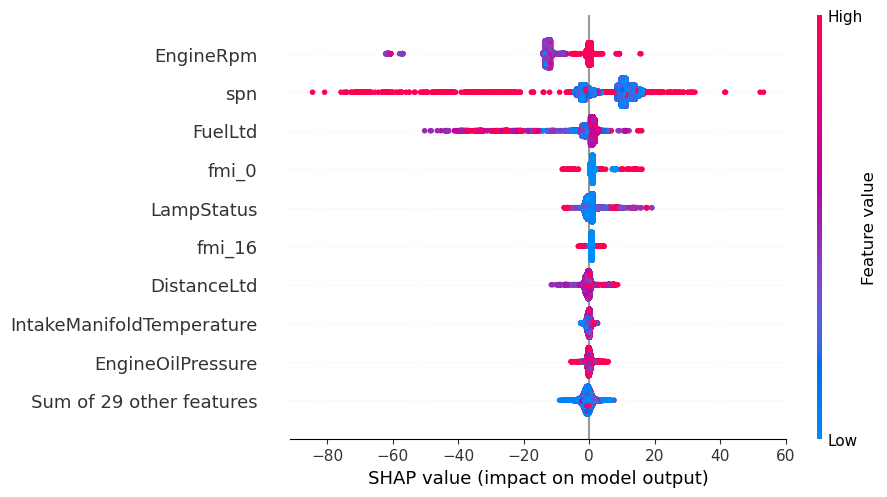

In [47]:
plot_feature_explainer(xgb, X_test, plot_type='beeswarm', model_type='tree')